## <center><b>Lab 9 - Dense Neural Network</b></center>
<center>Done by: Aardran Premakumar <br> 8844491</center>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix

### Loading and Exploring Dataset

In [2]:
# loading the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# info about the dataset
print("Number of training images: ", len(X_train))
print("Number of testing images: ", len(X_test))
print("Shape of each image: ", X_train[0].shape)
print(f'Unique labels: {set(y_train)}')

Number of training images:  60000
Number of testing images:  10000
Shape of each image:  (28, 28)
Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### Configuring and Training dense neural network with 3 hyperparameters

In [4]:
# configuring the three hyperparameters
config = [ {'activation' : 'relu','learning_rate': 0.001, 'layer_num': 1, 'node_num': 500},
          {'activation' : 'tanh','learning_rate': 0.001, 'layer_num': 2, 'node_num': 500},
          {'activation' : 'sigmoid','learning_rate': 0.001, 'layer_num': 3, 'node_num': 500}]

In [5]:
# training the model as dense neural network
def create_model(learning_rate, layer_num, node_num, activation):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for i in range(layer_num):
        model.add(Dense(node_num, activation = activation))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
result = [] # list to store the accuracy of each model configuration

# evaluating the accuracy of the each model configuration
for c in config:
    model = create_model(**c)
    model.fit(X_train, y_train, epochs=5)
    test_loss, test_acc = model.evaluate(X_test, y_test)
    result.append((c, test_acc))
    print("Configurations: ", c)
    print(f'Test accuracy: {test_acc}')


Epoch 1/5


1875/1875 [==============================] - 8s 4ms/step - loss: 4.3132 - accuracy: 0.7497
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5524 - accuracy: 0.8085
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5163 - accuracy: 0.8215
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4922 - accuracy: 0.8303
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.5602 - accuracy: 0.8019
Configurations:  {'activation': 'relu', 'learning_rate': 0.001, 'layer_num': 1, 'node_num': 500}
Test accuracy: 0.8019000291824341
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9560 - accuracy: 0.6296
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8674 - accuracy: 0.6588
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8615 - accuracy: 0.6599
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - 

### Best Configuration and it's accuracy, confusion matrix, and examples of incorrect classification

In [7]:
# finding the best configuration
best_config, best_acc = max(result, key=lambda x: x[1])
print(f'Best config: {best_config}, \nBest accuracy: {best_acc}')

Best config: {'activation': 'relu', 'learning_rate': 0.001, 'layer_num': 1, 'node_num': 500}, 
Best accuracy: 0.8019000291824341


In [8]:
# training the best model
best_model = create_model(**best_config)
best_model.fit(X_train, y_train, epochs=5)
pred = best_model.predict(X_test)

# finding the confusion matrix
cm = confusion_matrix(y_test, np.argmax(pred, axis=1))

print("Accuracy: ", best_acc)
print("\nConfusion Matrix\n",cm)

Epoch 1/5


1875/1875 [==============================] - 8s 4ms/step - loss: 4.4246 - accuracy: 0.7663
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5487 - accuracy: 0.8160
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5032 - accuracy: 0.8255
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4972 - accuracy: 0.8324
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
Accuracy:  0.8019000291824341

Confusion Matrix
 [[759   2  12  83   2   0 139   0   3   0]
 [  0 947   5  35   4   0   8   0   1   0]
 [  7   1 778  15 123   0  76   0   0   0]
 [ 12   7  10 899  13   0  58   0   1   0]
 [  0   1 131  85 733   0  49   0   1   0]
 [  2   0   0   0   0 914  13  37   3  31]
 [170   1 150  58 134   0 484   0   3   0]
 [  0   0   0   0   0  21   5 918   0  56]
 [  2   0   5   6  13  10  77   2 885   0]
 [  0   0   0   0   0   9   4  23   0 964]]


1/1 [==============================] - 0s 19ms/step


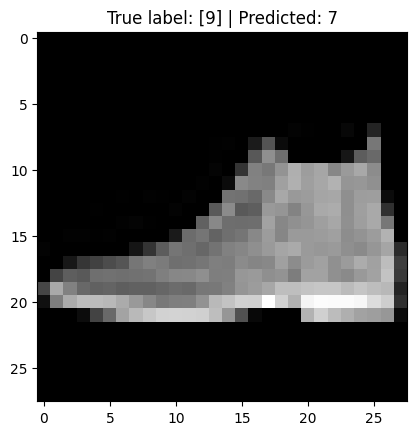

1/1 [==============================] - 0s 18ms/step


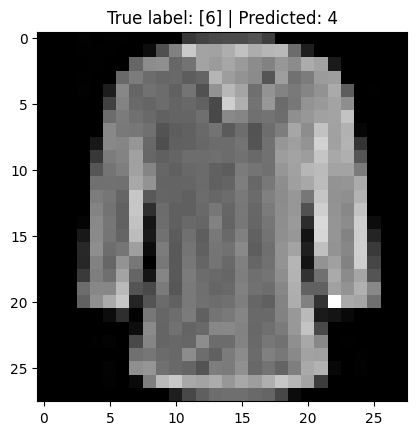

1/1 [==============================] - 0s 20ms/step


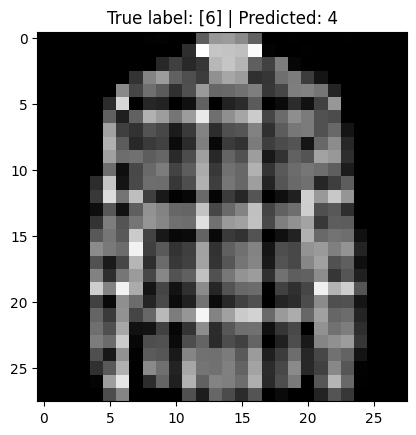

1/1 [==============================] - 0s 23ms/step


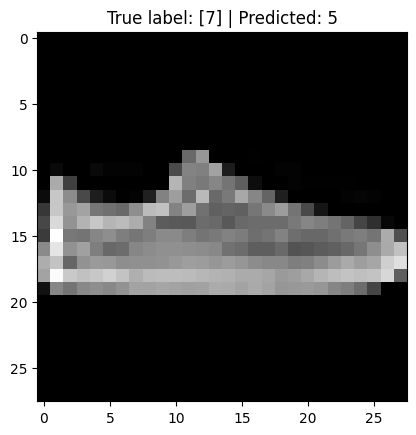

1/1 [==============================] - 0s 18ms/step


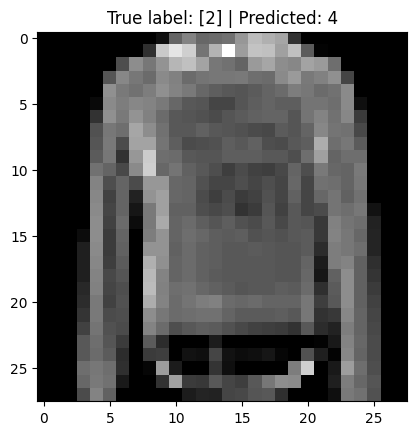

In [9]:
# finding incorrect predictions
incorrect_indices = tf.where(tf.not_equal(y_test, np.argmax(model.predict(X_test), axis=1)))
incorrect_images = X_test[incorrect_indices]
incorrect_labels = y_test[incorrect_indices]

# plotting the incorrect predictions
for i in range(5):
    image = incorrect_images[i].reshape((1, 28, 28))  # Reshape the image data
    plt.imshow(image[0], cmap='gray')
    plt.title(f"True label: {incorrect_labels[i]} | Predicted: {np.argmax(model.predict(image))}")
    plt.show()

### Conclusion

<p>The performance of a machine learning model can be greatly affected by the hyper parameters used to train it. Trying out different ways of activating neurons, algorithms for finding the best settings, the speed at which the model learns, and the number of times the model sees all the data can all lead to significant improvements in how accurate the model is.</p>